# Evaluation: Precision & Recall

Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics.

We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 

In [181]:
# Libraries
from sklearn.datasets import fetch_openml
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [2]:
# Load data
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

#### Now take a look at the shapes of the X and y matrices.

In [10]:
# your code here
#ax = sns.pointplot(x=y, y=X)
X.shape

(70000, 784)

In [11]:
y.shape

(70000,)

In [31]:
data_X = pd.DataFrame(X)
data_y = pd.DataFrame(y)
data_X[36000:36001]

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
36000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Let's pick one entry and see what number is written. Use indexing to pick the 36000th digit.

In [24]:
# your code here
data_y[36000:36001]

,0
36000,9


####  Use the *reshape(28,28)* method and *plt.imshow()* function with the parameters *cmap = matplotlib.cm.binary* and *interpolation="nearest"* to make a plot of the number. Be sure to import matplotlib.

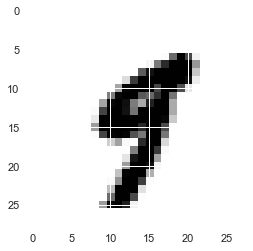

In [41]:
# your code here
#np.reshape(X, (28, 28)) # this is not possible it works with teh 1 diemntial ARRAY 

a = X[36000:36001].reshape((28,28))
plt.imshow(a, cmap = plt.cm.binary, interpolation="nearest")

#### Use indexing to see if what the plot shows matches with the outcome of the 36000th index.

In [44]:
data_y[36000:36001] # yes this is correct 

,0
36000,9


#### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training and the rest for testing.

In [90]:
# your code here
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle = True)

X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

#### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5.

In [91]:
# your code here

y_test_5 = np.where(y_test == '5', 1,0)
y_train_5 = np.where(y_train == '5', 1,0)
len(y_test_5)
len(y_train_5)

60000

#### Lets train a logistic regression to predict if a number is a 5 or not. Remember to use the 'just 5s' target train array.

In [122]:
# your code here

#clf = LogisticRegression().fit(X_train, y_train_5)
clf = LogisticRegression() # create an iinstance of object (Blue print van het huis | lege hoofdsructuur)
clf.fit(X_train, y_train_5) # training, via the method above 

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Does the classifier predict correctly the 36000th digit we picked before?

In [117]:
# your code here
#clf.predict(X_train[36000].reshape(1,-1))
clf.predict(X_train[36000:36001])

array([0])

In [102]:
# a 0 means that the 36000th digit is not a 5, which is correct 

#### The 35th value is a 5. Check if it was correctly predicted.

In [118]:
# your code here
clf.predict(X_train[35:36])#.reshape(1,-1)

array([1])

In [ ]:
# a 1 means that the 35th digit is a 5, which is correct

#### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below.

In [104]:
# Libraries
from sklearn.base import BaseEstimator

In [105]:
# Dumb classifier
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1))[:, 0]

never_5_clf = Never5Classifier() # create an instance of object (Blue print van het huis | lege hoofdsructuur)

#### Now lets fit and predict on the testing set using our dumb classifier.

In [124]:
# your code here

never_5_clf.fit(X_train) # training, via the method above 

never_5_clf.predict(X_train[35:36]) # predict based on the training and chosen structure 

array([0.])

#### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [144]:
# 1 Confusion matrix

predict_dum = never_5_clf.predict(X_test)
predict_smart = clf.predict(X_test)
type(list(predict_dum)[0]) # float
type(list(predict_smart)[0]) # int 
type(list(y_test)[0]) # string this is loggic because we need to use y_test_5 instead of y_test
print("smart model confusion matrix: \n", confusion_matrix(y_test_5, predict_smart))
print("\ndum model confusion matrix: \n", confusion_matrix(y_test_5, predict_dum))

smart model confusion matrix: 
 [[9026   82]
 [ 145  747]]

dum model confusion matrix: 
 [[9108    0]
 [ 892    0]]


In [173]:
# 2. Precision | Recall | f1_scores
print("smart model precision_recall_fscore: \n", 
      precision_recall_fscore_support(y_test_5, predict_smart, average='micro'))

print("\ndum  model precision_recall_fscore: \n", 
      precision_recall_fscore_support(y_test_5, predict_dum, average='micro'))

print("\n 2 dum  model precision_recall_fscore: \n", 
      precision_recall_fscore_support(y_test_5, predict_dum, average='weighted'))

smart model precision_recall_fscore: 
 (0.9773, 0.9773, 0.9773000000000001, None)

dum  model precision_recall_fscore: 
 (0.9108, 0.9108, 0.9108, None)

 2 dum  model precision_recall_fscore: 
 (0.82955664, 0.9108, 0.8682820180029306, None)


#### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
# your answer here
'''
It shows that both models are working qiet well in the case the data is imbalanced into the positive side.

But when we apply the dum model on a adat set with a balanced set, it will be significant les good.
This will probiably less the case with the 'smart' model

'''

#### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each.

In [180]:
# your code here
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
fpr_dum, tpr_dum, thresholds_dum = metrics.roc_curve(y_test_5, predict_dum, pos_label=2)
fpr_smart, tpr_smart, thresholds_smart = metrics.roc_curve(y_test_5, predict_smart, pos_label=2)

#### Now find the roc_auc_score for each. 

In [182]:
# your code here
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html


print("smart model roc_auc_score: \n", roc_auc_score(y_test_5, predict_smart))
print("\ndum model roc_auc_score: \n", roc_auc_score(y_test_5, predict_dum))


smart model roc_auc_score: 
 0.9142204359839378

dum model roc_auc_score: 
 0.5


#### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
# your answer here
# the roc score of the dum model is clearly lower than the roc score of the smart model 
# so the smart model works probably better 
